Select the operation: (1) insert (2) delete (3) stop: 1


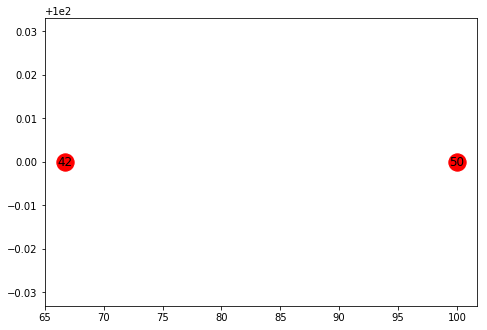

Select the operation: (1) insert (2) delete (3) stop: 1


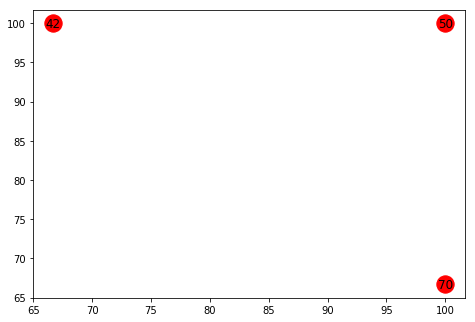

Select the operation: (1) insert (2) delete (3) stop: 1


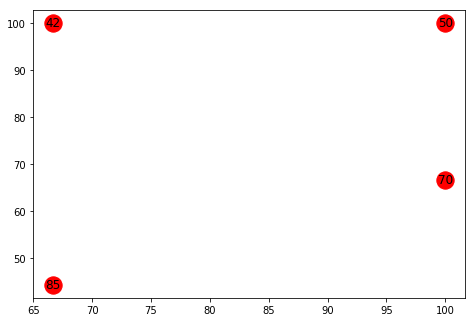

Select the operation: (1) insert (2) delete (3) stop: 1


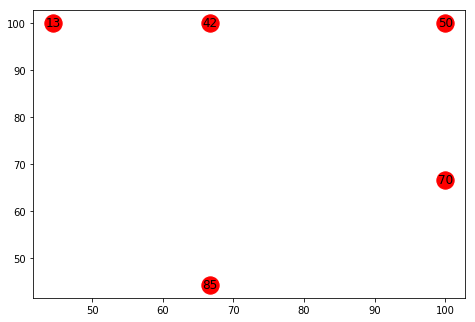

Select the operation: (1) insert (2) delete (3) stop: 1


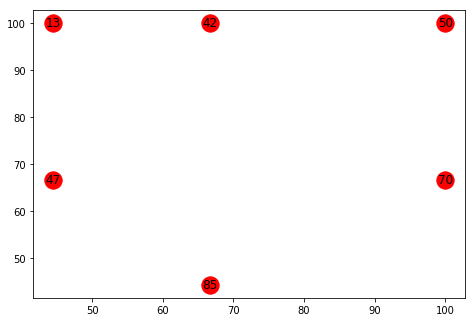

Select the operation: (1) insert (2) delete (3) stop: 3
Lookup Operation: Choose two points in your CAN to find the basic route: 
Provide start node: 50
Provide destination node: 85
Source to Destination path: 
50 =>70
70 =>85



In [9]:
import networkx as nx
import sys
G=nx.Graph()
class node:
    def __init__(self,element=None):
        self.element=element
        self.left_side=None
        self.right_side=None
        self.previous=None 

class binary_tree:
    def __init__(self):
        self.root_node=None

    def node_input(self,element):
        if self.root_node==None:
            self.root_node=node(element)
        else:
            self._node_input(element,self.root_node)



    def _node_input(self,element,current):
        if element<current.element:
            if current.left_side==None:
                current.left_side=node(element)
                current.left_side.previous=current # set previous
                prev[element]=current.element
                y_element[element]=y_element[current.element]
                x_element[element]=x_element[current.element]/1.5
            else:
                self._node_input(element,current.left_side)
        elif element>current.element:
            if current.right_side==None:
                current.right_side=node(element)
                current.right_side.previous=current # set previous
                prev[element]=current.element
                y_element[element]=(y_element[current.element]/1.5)
                x_element[element]=x_element[current.element] /(self.length()*0.5)
            else:
                self._node_input(element,current.right_side)
        else:
            print ("Element already in CAN!")
        


    def print1(self):
        if self.root_node!=None:
            self._print1(self.root_node)
            pos=nx.get_node_attributes(G,'pos')
            import matplotlib.pyplot as plt
            nx.draw(G,pos,with_labels=True)
            plt.axis('on')
            plt.show()

    def _print1(self,current):
        if current!=None:
            self._print1(current.left_side)
            
            G.add_node(current.element,pos=(x_element[current.element],y_element[current.element]))
            self._print1(current.right_side)

    def print_graph(self):
        if self.root_node!=None:
            self._print_graph(self.root_node)

    def _print_graph(self,current):
        if current!=None:
            g.add_vertex(Vertex(str(current.element)))
            if(current.left_side!=None):
                #print(current.left_side.element)
                g.add_vertex(Vertex(str(current.left_side.element)))
                g.add_edge(str(current.element),str(current.left_side.element))
            if(current.right_side!=None):
                #print(current.right_side.element)
                g.add_vertex(Vertex(str(current.right_side.element)))
                g.add_edge(str(current.element),str(current.right_side.element))
            self._print_graph(current.left_side)
            #print (str(current.element))
            self._print_graph(current.right_side)
        
               
    def length(self):
        if self.root_node!=None:
            return self._length(self.root_node,0)
        else:
            return 0
    
    def _length(self,current,cur_length):
        if current==None: return cur_length
        left_length=self._length(current.left_side,cur_length+1)
        right_length=self._length(current.right_side,cur_length+1)
        return max(left_length,right_length)



    
    def search(self,element):
        if self.root_node!=None:
            return self._search(element,self.root_node)
        else:
            return False


    def _search(self,element,current):
        if element==current.element:
            return True
        elif element<current.element and current.left_side!=None:
            return self._search(element,current.left_side)
        elif element>current.element and current.right_side!=None:
            return self._search(element,current.right_side)
        return False 

    def delete_element(self,element):
        G.remove_node(element)
        return self.delete_node(self.lookup(element))
    
    def lookup(self,element):
        if self.root_node!=None:
            return self._lookup(element,self.root_node)
        else:
            return None


    def _lookup(self,element,current):
        if element==current.element:
            return current
        elif element<current.element and current.left_side!=None:
            return self._lookup(element,current.left_side)
        elif element>current.element and current.right_side!=None:
            return self._lookup(element,current.right_side)


    def delete_node(self,node):
        if node==None or self.lookup(node.element)==None:
            print ("Node to be deleted not found in the CAN!")
            return None 
 
        def minimum_element_node(n):
            current=n
            while current.left_side!=None:
                current=current.left_side
            return current


        def sub_node(n):
            sub_node=0
            if n.left_side!=None: 
                sub_node+=1
            if n.right_side!=None:
                sub_node+=1
            return sub_node
        node_previous=node.previous
        node_sub_treeren=sub_node(node)
        if node_sub_treeren==0:
            if node_previous!=None:
                if node_previous.left_side==node:
                    node_previous.left_side=None
                else:
                    node_previous.right_side=None
                    
                    
            else:
                self.root_node=None
        if node_sub_treeren==1:
            if node.left_side!=None:
                sub_tree=node.left_side
            else:
                sub_tree=node.right_side
            if node_previous!=None:
                if node_previous.left_side==node:
                    node_previous.left_side=sub_tree
                else:
                    node_previous.right_side=sub_tree
            else:
                self.root_node=sub_tree
            sub_tree.previous=node_previous
        if node_sub_treeren==2:
            previous_tree_node=minimum_element_node(node.right_side)
            node.element=previous_tree_node.element
            self.delete_node(previous_tree_node)


def data_input(tree,num_elem=1, total_int=100):
    from random import randint
    ##for _in in range(num_elem):
    value= randint(0,total_int)
    lookup=tree.lookup(value)
    while(lookup!=None):
        
            
        value= randint(0,total_int)
        lookup=tree.lookup(value)
        
        
    tree.node_input(value)
    
            
            
        
    return tree

##initialize graph class ##
class Vertex:
    def __init__(self, a):
        
        self.name= a
        self.adjacency_list = list()
        self.dist = 1000
        self.status = 'not_visited'
    def add_adjacency_list(self,a):
        if a not in self.adjacency_list:
            self.adjacency_list.append(a)
            self.adjacency_list.sort()
           

        
        
class Graph:
    list_of_vertex = {}
    
    def add_vertex(self, v):
        if isinstance(v, Vertex) and v.name not in self.list_of_vertex:
            self.list_of_vertex[v.name] = v
            return True
        else:
            return False
    
    def add_edge(self, u, v):
        if u in self.list_of_vertex and v in self.list_of_vertex:
            for key, element in self.list_of_vertex.items():
                if key == u:
                    element.add_adjacency_list(v)
                if key == v:
                    element.add_adjacency_list(u)
                    

            return True
        else:
            return False

            
    def breadth_first_search(self, src, dst, path):
        

        queue = list()
        src.dist = 0
        src.status = 'visited'
        for v in src.adjacency_list:
            
            
            self.list_of_vertex[v].dist = src.dist + 1
            queue.append(v)
            
            path[v]=src.name
        
        while len(queue) > 0:
            
            u = queue.pop(0)
            node_u = self.list_of_vertex[u]
            node_u.status = 'visited'
            if(dst == u):
                
                break
            
            
            for v in node_u.adjacency_list:
                
                node_v = self.list_of_vertex[v]
                
                if node_v.status == 'not_visited':
                    queue.append(v)
                    
                    if node_v.dist > (node_u.dist + 1):
                        
                        
                        node_v.dist = node_u.dist +1
                        path[v]=u

##Graph class finished

g = Graph()


tree= binary_tree()
prev={}
y_element={}
x_element={}
tree.node_input(50)
y_element[50]=100
x_element[50]=100

op=eval(input("Select the operation: (1) insert (2) delete (3) stop: "))

while(op!=3):
    if(op==1):
        
        tree= data_input(tree)
        tree.print1()
        
    
    if(op==2):
        
        element = eval(input("choose the node to delete: "))
        tree.delete_element(int(element))
        tree.print1()
    
    #print("select the operation: (1) node_input (2) delete (3)stop")
    op=eval(input("Select the operation: (1) insert (2) delete (3) stop: "))
    
print("Lookup Operation: Choose two points in your CAN to find the basic route: ")

start_node= int(input("Provide start node: "))
a= Vertex(str(start_node))
g.add_vertex(a)
end_node = int(input("Provide destination node: "))
b= Vertex(str(end_node))
g.add_vertex(b)

tree.print_graph()
path = {}
g.breadth_first_search(a,b, path)

out =""
v= str(end_node)

while(v!=str(start_node)):
    
    u=path[v]
    out= u +" =>"+ v +"\n"+ out
    v=str(u)
print("Source to Destination path: \n"+out)      

